In [1]:
pip install pandas scikit-learn matplotlib rich

You should consider upgrading via the '/Users/jbranco/.pyenv/versions/3.10.4/envs/capstone/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utilities import print_goalie_stats, print_skater_stats, show_nationality_options, show_position_options

In [3]:
file_path = 'data/nhl_data.csv'  
ndd = pd.read_csv(file_path)

In [4]:
# This model is used to predict the number of games played, goals, assists, points, and plus_minus
# You initialize the model with the number of trees you want to use, and a random state for reproducibility
projection_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# ColumnTransformer allows you to apply different transformations to different columns in your dataset
# In our case, we want to apply OneHotEncoding to the position and nationality columns, and leave the overall_pick and age columns as they are
# OneHotEncoding is used to convert categorical data into a format that can be provided to ML algorithms to do a better job in prediction
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', 'passthrough', ["overall_pick", "age"]),  
        ('cat', OneHotEncoder(), ['position', 'nationality'])  
    ])

In [5]:
# Define the features and target variable
x = ndd[["overall_pick", "position", 'nationality', "age"]]  
y = ndd[['year', 'to_year', 'games_played', 'goals', 'assists', 'points', 'plus_minus', 'goalie_games_played', 'goalie_wins', 
         'goalie_losses', 'goalie_ties_overtime', 'save_percentage', 'goals_against_average']]

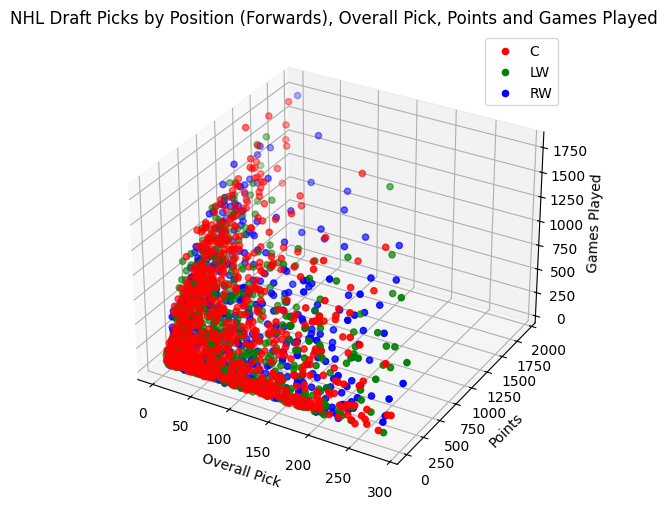

In [6]:
# Create a scatter plot of draft position vs point totals, with different colors for each position
# only use some overall_pick, positionm and point_totals from ndd
forward_plot = ndd[['overall_pick', 'position', 'points', 'games_played']]  
forward_plot = forward_plot[forward_plot['position'].isin(['C', 'LW', 'RW'])]  
forward_plot = forward_plot[forward_plot['games_played'] > 50]  
  
# Create a color dictionary for the positions  
colors = {'C': 'red', 'LW': 'green', 'RW': 'blue'}  
  
fig = plt.figure(figsize=(10, 6))  
ax = fig.add_subplot(111, projection='3d')  
  
for position in ['C', 'LW', 'RW']:    
    ax.scatter(forward_plot['overall_pick'][forward_plot['position'] == position],     
               forward_plot['points'][forward_plot['position'] == position],  
               forward_plot['games_played'][forward_plot['position'] == position],  
               color=colors[position],     
               label=position)   
  
ax.set_title('NHL Draft Picks by Position (Forwards), Overall Pick, Points and Games Played')    
ax.set_xlabel('Overall Pick')    
ax.set_ylabel('Points')  
ax.set_zlabel('Games Played')  
ax.legend()    
  
plt.show() 

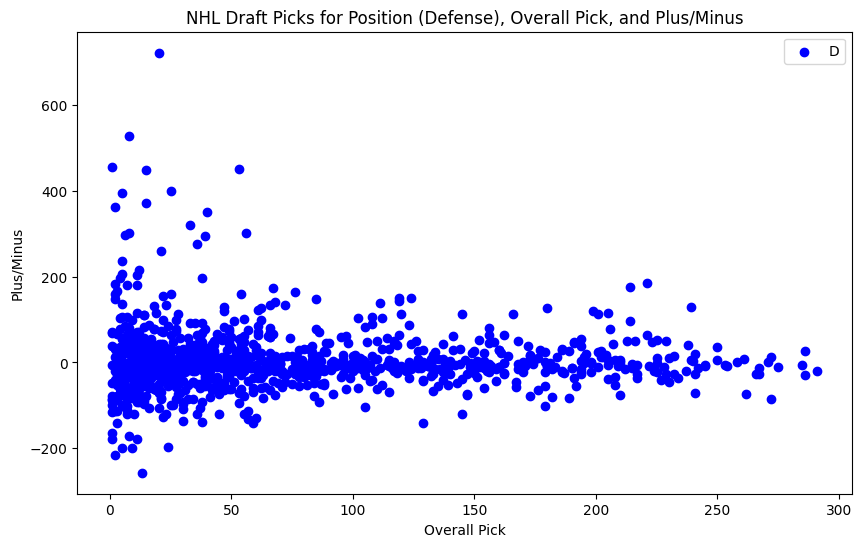

In [7]:
defense_plot = ndd[['overall_pick', 'position', 'plus_minus', 'games_played']]  
defense_plot = defense_plot[defense_plot['position'] == 'D']  
defense_plot = defense_plot[defense_plot['games_played'] > 50]  
  
plt.figure(figsize=(10,6))  
plt.scatter(defense_plot['overall_pick'], defense_plot['plus_minus'], color='blue', label='D')  
  
plt.title('NHL Draft Picks for Position (Defense), Overall Pick, and Plus/Minus')  
plt.xlabel('Overall Pick')  
plt.ylabel('Plus/Minus')  
plt.legend()  # Add a legend  
  
plt.show()

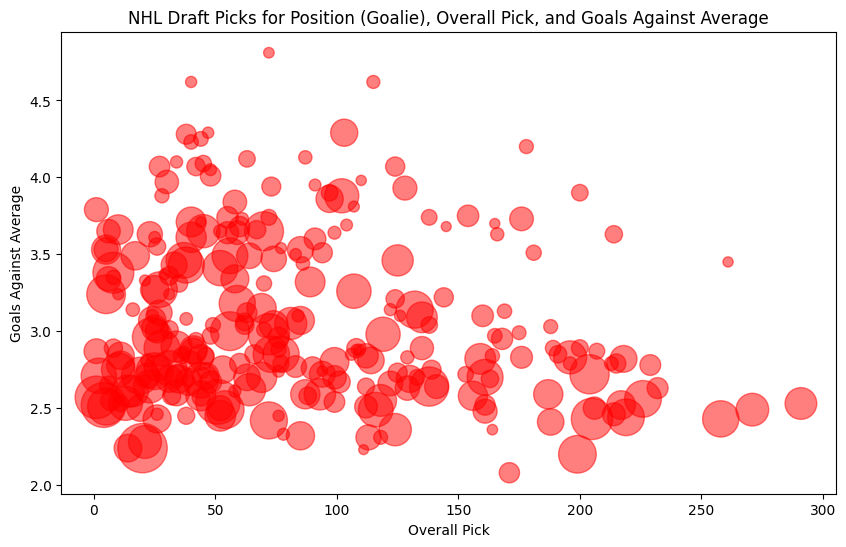

In [8]:
goalie_plot = ndd[['overall_pick', 'position', 'goals_against_average', 'games_played']]  
goalie_plot = goalie_plot[goalie_plot['position'] == 'G']  
goalie_plot = goalie_plot[goalie_plot['games_played'] > 50]  
  
plt.figure(figsize=(10,6))  
plt.scatter(goalie_plot['overall_pick'], goalie_plot['goals_against_average'], s=goalie_plot['games_played'], color='red', alpha=0.5)  
  
plt.title('NHL Draft Picks for Position (Goalie), Overall Pick, and Goals Against Average')  
plt.xlabel('Overall Pick')  
plt.ylabel('Goals Against Average')  
  
plt.show() 

In [9]:
# Fit and transform X to the preprocessor
x = preprocessor.fit_transform(x) 

In [11]:
# Fit the model
projection_model.fit(x, y)

RandomForestRegressor(random_state=42)

In [12]:
# Show user the options for position and nationality
show_nationality_options()
show_position_options()

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Country Code ┃ Country             ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ SK           │ Slovakia            │
│ US           │ United States       │
│ CA           │ Canada              │
│ SE           │ Sweden              │
│ CZ           │ Czech Republic      │
│ AT           │ Austria             │
│ RU           │ Russia              │
│ FI           │ Finland             │
│ CH           │ Switzerland         │
│ DE           │ Germany             │
│ LV           │ Latvia              │
│ PL           │ Poland              │
│ BY           │ Belarus             │
│ GB           │ United Kingdom      │
│ KZ           │ Kazakhstan          │
│ NO           │ Norway              │
│ UA           │ Ukraine             │
│ UZ           │ Uzbekistan          │
│ DK           │ Denmark             │
│ AU           │ Australia           │
│ TH           │ Thailand            │
│ JM           │ Jamaica             │
│ FR           │ France              │
│ SI           │ Slovenia            │
│ BE           │ Belgium             │
│ NL           │ Netherlands         │
│ CN           │ China               │
│ LT           │ Lithuania           │
│ IT           │ Italy               │
│ NG           │ Nigeria             │
│ EE           │ Estonia             │
│ JP           │ Japan               │
│ ME           │ Montenegro          │
│ HU           │ Hungary             │
│ YU           │ Former Yugoslavia   │
│ BS           │ Bahamas             │
│ BR           │ Brazil              │
│ TZ           │ Tanzania            │
│ BN           │ Brunei              │
│ KR           │ South Korea         │
│ ZA           │ South Africa        │
│ SU           │ Former Soviet Union │
│ HT           │ Haiti               │
│ TW           │ Taiwan              │
│ PY           │ Paraguay            │
│ VE           │ Venezuela           │
└──────────────┴─────────────────────┘

┏━━━━━━━━━━━━━━┓
┃ Position     ┃
┃ Options      ┃
┡━━━━━━━━━━━━━━┩
│ C            │
│ LW           │
│ RW           │
│ D            │
│ G            │
└──────────────┘

In [13]:
project_another = True

while project_another:
    # Get user input for the player to make projections for
    overall_pick = int(input("Enter the draft pick number: "))  
    player_age = float(input("Enter the player's age: "))  
    position = input("Enter the player's position: ")  
    nationality = input("Enter the player's nationality (Country Code): ")  


    new_data = np.array([[overall_pick, position, nationality, player_age]])  
    new_data_df = pd.DataFrame(new_data, columns=["overall_pick", "position", 'nationality', "age"])  
    new_data_transformed = preprocessor.transform(new_data_df)  

    prediction = projection_model.predict(new_data_transformed)  

    for p in prediction:  
        for p in prediction:
            # Display the data back to the user
            print_func = print_goalie_stats if position == 'G' else print_skater_stats  
            print_func(p)
    
    project_another = input("Would you like to project another player? (y/n): ").lower() == 'y'

Enter the draft pick number:  27
Enter the player's age:  18
Enter the player's position:  LW
Enter the player's nationality (Country Code):  CA


┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Games Played    ┃ Goals             ┃ Assists            ┃ Points          ┃ Plus Minus         ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 367.6745042016… │ 74.16604061624648 │ 102.79358403361346 │ 176.95962464986 │ 13.769712885154062 │
└─────────────────┴───────────────────┴────────────────────┴─────────────────┴────────────────────┘

Would you like to project another player? (y/n):  y
Enter the draft pick number:  12
Enter the player's age:  18
Enter the player's position:  RW
Enter the player's nationality (Country Code):  US


┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Games Played    ┃ Goals              ┃ Assists            ┃ Points            ┃ Plus Minus          ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 437.3154264069… │ 109.49889718614719 │ 130.93780627705632 │ 240.4367034632035 │ -13.371245670995672 │
└─────────────────┴────────────────────┴────────────────────┴───────────────────┴─────────────────────┘

Would you like to project another player? (y/n):  n
